In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'F:\E_Girdawari\Traning_Data\Barwani_training_202148.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202148 entries, 0 to 202147
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     202148 non-null  int64  
 1   District_Name  202148 non-null  object 
 2   DistCode       202148 non-null  int64  
 3   Village_Name   202148 non-null  object 
 4   Village_code   202148 non-null  int64  
 5   khasra_No      202148 non-null  object 
 6   UID            202148 non-null  object 
 7   Crop_2019      202148 non-null  object 
 8   Crop_2021      202148 non-null  object 
 9   Crop_2022      202148 non-null  object 
 10  Band1          202148 non-null  float64
 11  Band2          202148 non-null  float64
 12  Band3          202148 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 20.0+ MB


In [3]:
# df['Band3'] = df['Band3'].astype()

In [4]:
def zero_count(x):
    for i in x:
        a=list(x[i])
        print(i,a.count(0))
        
def remove_unnamed(y):
    unnamed= y.loc[:, ~y.columns.str.contains('^Unnamed')]
    return unnamed


def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers


def remove_outlier(df):
    index_names = df[ (df['Band1'] >= 2600) & (df['Band2'] >= 2500) & (df['Band3'] >= 6000)].index 
    df.drop(index_names, inplace = True) 
    return df
zero_count(df)
df=remove_unnamed(df)

Unnamed: 0 1
District_Name 0
DistCode 0
Village_Name 0
Village_code 0
khasra_No 0
UID 0
Crop_2019 0
Crop_2021 0
Crop_2022 0
Band1 0
Band2 0
Band3 0


In [5]:
df

,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
0,Barwani,49,Semalda,478198,185/3,478198_185/3,wheat,other,makka,2095.0,1863.0,3996.0
1,Barwani,49,Lakhangaon,478196,3/1,478196_3/1,wheat,wheat,wheat,1989.0,1949.0,2831.0
2,Barwani,49,Shahpura,478597,57,478597_57,wheat,wheat,wheat,1803.0,1747.0,2959.0
3,Barwani,49,Kansul,478422,110,478422_110,fallow,other,other,1897.0,1730.0,3374.0
4,Barwani,49,Kansul,478422,112,478422_112,fallow,wheat,other,1965.0,1703.0,3768.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202143,Barwani,49,Gumadya khurd,478497,74,478497_74,fallow,gram,wheat,1978.0,2274.0,2878.0
202144,Barwani,49,Gumadya khurd,478497,100,478497_100,wheat,fallow,gram,2173.0,2324.0,2910.0
202145,Barwani,49,Umarda,478242,168,478242_168,wheat,other,wheat,1930.0,1651.0,3701.0
202146,Barwani,49,Umarda,478242,60,478242_60,other,wheat,wheat,1972.0,1907.0,2240.0


In [6]:
df=df.replace(0,np.nan)
df.isnull().sum()
#df=df.dropna()

District_Name    0
DistCode         0
Village_Name     0
Village_code     0
khasra_No        0
UID              0
Crop_2019        0
Crop_2021        0
Crop_2022        0
Band1            0
Band2            0
Band3            0
dtype: int64

In [7]:
df.describe(include= 'all')

,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
count,202148,202148.0,202148,202148.000000,202148,202148,202148,202148,202148,202148.000000,202148.000000,202148.000000
unique,1,NaN,551,NaN,34277,202148,4,5,5,NaN,NaN,NaN
top,Barwani,NaN,Chitawal,NaN,12/2,478586_191/1,wheat,wheat,wheat,NaN,NaN,NaN
freq,202148,NaN,2263,NaN,172,1,145967,141442,149239,NaN,NaN,NaN
mean,NaN,49.0,NaN,481762.723826,NaN,NaN,NaN,NaN,NaN,1958.059298,1834.370407,3317.022736
std,NaN,0.0,NaN,34546.323970,NaN,NaN,NaN,NaN,NaN,142.603902,285.435049,621.360686
min,NaN,49.0,NaN,477983.000000,NaN,NaN,NaN,NaN,NaN,1580.000000,1364.000000,1395.000000
25%,NaN,49.0,NaN,478212.000000,NaN,NaN,NaN,NaN,NaN,1849.000000,1602.000000,2865.000000
50%,NaN,49.0,NaN,478336.000000,NaN,NaN,NaN,NaN,NaN,1936.000000,1777.000000,3189.000000
75%,NaN,49.0,NaN,478507.000000,NaN,NaN,NaN,NaN,NaN,2046.000000,2006.000000,3700.000000


In [8]:
# if df.isna().sum().sum() > 0:
#     print('Data contains missing values or NaNs')
# else:
#     print('Data does not contain missing values or NaNs')


In [9]:
df.drop(['District_Name','DistCode','Village_Name','Village_code','khasra_No','UID','Crop_2019','Crop_2021'],axis=1,inplace=True)
df

,Crop_2022,Band1,Band2,Band3
0,makka,2095.0,1863.0,3996.0
1,wheat,1989.0,1949.0,2831.0
2,wheat,1803.0,1747.0,2959.0
3,other,1897.0,1730.0,3374.0
4,other,1965.0,1703.0,3768.0
...,...,...,...,...
202143,wheat,1978.0,2274.0,2878.0
202144,gram,2173.0,2324.0,2910.0
202145,wheat,1930.0,1651.0,3701.0
202146,wheat,1972.0,1907.0,2240.0


In [10]:
df.corr()

,Band1,Band2,Band3
Band1,1.000000,0.888900,-0.331467
Band2,0.888900,1.000000,-0.551822
Band3,-0.331467,-0.551822,1.000000


In [11]:
df['Crop_2022'].value_counts()

wheat      149239
makka       21834
gram        19195
other       11842
mustard        38
Name: Crop_2022, dtype: int64

In [12]:
df=df.replace(['wheat'],1)
df=df.replace(['gram'],2)
df=df.replace('mustard',3)
df=df.replace(['other','makka'],4)
# df=df.replace('dhaniya beej',5)
# df=df.replace('masoor',6)
df

,Crop_2022,Band1,Band2,Band3
0,4,2095.0,1863.0,3996.0
1,1,1989.0,1949.0,2831.0
2,1,1803.0,1747.0,2959.0
3,4,1897.0,1730.0,3374.0
4,4,1965.0,1703.0,3768.0
...,...,...,...,...
202143,1,1978.0,2274.0,2878.0
202144,2,2173.0,2324.0,2910.0
202145,1,1930.0,1651.0,3701.0
202146,1,1972.0,1907.0,2240.0


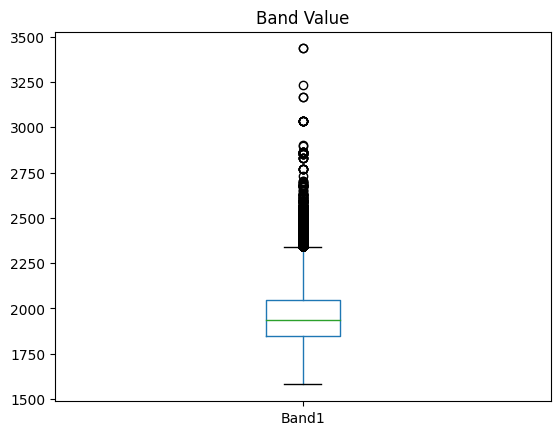

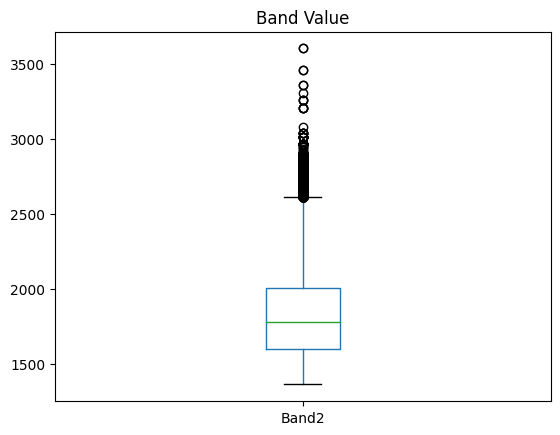

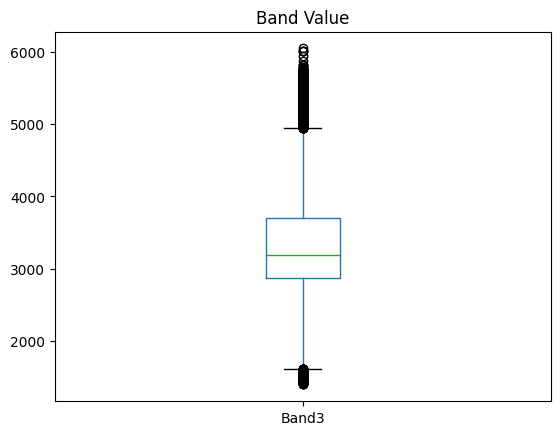

In [13]:
for i in range(1,4):
    Band="Band"+str(i)
    df[Band].plot(kind='box', title='Band Value') 
    plt.show()

In [14]:
for i in range(1,4):
    Band="Band"+str(i)
    outliers = find_outliers_IQR(df[Band])

    print("number of outliers:"+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value:"+ str(outliers.min()))
# print(list(outliers))

number of outliers:2197
max outlier value: 3435.0
min outlier value:2342.0
number of outliers:1496
max outlier value: 3602.0
min outlier value:2613.0
number of outliers:2728
max outlier value: 6049.0
min outlier value:1395.0


In [15]:
# index_names = df[ (df['Band1'] >= 2600) & (df['Band2'] >= 2500) & (df['Band3'] >= 6000)].index 

# df.drop(index_names, inplace = True) 
# index_names
remove_outlier(df)

,Crop_2022,Band1,Band2,Band3
0,4,2095.0,1863.0,3996.0
1,1,1989.0,1949.0,2831.0
2,1,1803.0,1747.0,2959.0
3,4,1897.0,1730.0,3374.0
4,4,1965.0,1703.0,3768.0
...,...,...,...,...
202143,1,1978.0,2274.0,2878.0
202144,2,2173.0,2324.0,2910.0
202145,1,1930.0,1651.0,3701.0
202146,1,1972.0,1907.0,2240.0


In [16]:
# df.corr()
# df2=df.groupby('Crop_2022').sample(frac=1, random_state=1, replace=True)
# print(df2.info())
df

,Crop_2022,Band1,Band2,Band3
0,4,2095.0,1863.0,3996.0
1,1,1989.0,1949.0,2831.0
2,1,1803.0,1747.0,2959.0
3,4,1897.0,1730.0,3374.0
4,4,1965.0,1703.0,3768.0
...,...,...,...,...
202143,1,1978.0,2274.0,2878.0
202144,2,2173.0,2324.0,2910.0
202145,1,1930.0,1651.0,3701.0
202146,1,1972.0,1907.0,2240.0


In [17]:
y = df['Crop_2022']
X= df[['Band1','Band2','Band3']]

In [18]:
from sklearn.model_selection import train_test_split
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1, shuffle=True, stratify=y)

In [19]:
X_ctrain

,Band1,Band2,Band3
91256,1808.0,1575.0,2759.0
31950,1886.0,1699.0,2998.0
20345,2327.0,2613.0,2998.0
98757,1910.0,1880.0,2779.0
21183,2013.0,1791.0,3531.0
...,...,...,...
167880,1948.0,1778.0,3213.0
164821,1808.0,1540.0,4043.0
32401,1996.0,2131.0,3151.0
117310,1810.0,1463.0,4560.0


In [20]:
X_ctest

,Band1,Band2,Band3
34013,1799.0,1480.0,4601.0
140777,1835.0,1555.0,3703.0
62874,1873.0,1892.0,2589.0
100171,2157.0,2201.0,2906.0
32696,1993.0,1719.0,3321.0
...,...,...,...
157496,1812.0,1587.0,3005.0
111120,2113.0,2075.0,2992.0
85367,1934.0,1715.0,3165.0
64469,1949.0,2217.0,3059.0


In [21]:
y_ctrain

91256     4
31950     4
20345     1
98757     4
21183     1
         ..
167880    4
164821    4
32401     1
117310    1
115296    1
Name: Crop_2022, Length: 161718, dtype: int64

In [22]:
y_ctest

34013     4
140777    1
62874     1
100171    1
32696     1
         ..
157496    1
111120    1
85367     4
64469     1
114515    1
Name: Crop_2022, Length: 40430, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
tre= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=1, max_leaf_nodes=100, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [24]:
# from sklearn.ensemble import RandomForestClassifier 
# # Create a Random forest Classifier 
# tre= RandomForestClassifier(n_estimators = 100) 

In [25]:
# from sklearn.neural_network import MLPClassifier
# tre= MLPClassifier(random_state=1, max_iter=300)

In [26]:
# fit data in classification model 
tre.fit(X_ctrain, y_ctrain)

DecisionTreeClassifier(max_leaf_nodes=100, random_state=1)

In [27]:
# model testing 
print(tre.score(X_ctrain, y_ctrain))
print(tre.score(X_ctest, y_ctest))
# print(tre.feature_importances_)
print(tre.feature_names_in_)
print(metrics.confusion_matrix(y_ctrain, tre.predict(X_ctrain)))
print(metrics.confusion_matrix(y_ctest, tre.predict(X_ctest)))
print(metrics.confusion_matrix(y, tre.predict(X)))

0.7452540842701493
0.7434083601286173
['Band1' 'Band2' 'Band3']
[[118384    763      0    244]
 [ 13506   1757      0     93]
 [    30      0      0      0]
 [ 26043    518      0    380]]
[[29562   215     0    71]
 [ 3407   416     0    16]
 [    8     0     0     0]
 [ 6522   135     0    78]]
[[147946    978      0    315]
 [ 16913   2173      0    109]
 [    38      0      0      0]
 [ 32565    653      0    458]]


In [28]:
# print(metrics.classification_report(y_ctrain, tre.predict(X_ctrain)))
# print(metrics.classification_report(y_ctest, tre.predict(X_ctest)))
# print(metrics.classification_report(y, tre.predict(X)))
# from sklearn.metrics import hamming_loss
# metrics.hamming_loss(y,tre.predict(X))
# from sklearn.metrics import jaccard_score
# metrics.jaccard_score(y,tre.predict(X),average='weighted')
# from sklearn.metrics import matthews_corrcoef
# metrics.matthews_corrcoef(y,tre.predict(X))
# from sklearn.metrics import roc_auc_score
# metrics.roc_auc_score(y,tre.predict_proba(X),multi_class='ovr',average='weighted')
# from sklearn.metrics import top_k_accuracy_score
# metrics.top_k_accuracy_score(y,tre.predict_proba(X))
# from sklearn.metrics import zero_one_loss
# metrics.zero_one_loss(y,tre.predict(X),normalize=True)
# from sklearn.metrics import fbeta_score
# metrics.fbeta_score(y,tre.predict(X),average='weighted',beta=0.5)
print(tre.get_n_leaves())
ypred=tre.predict(X)
ypred

100


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Test  Data

In [29]:
df0 = pd.read_csv(r'F:\E_Girdawari\Test_Data\Barwani.csv')
df0

,Unnamed: 0,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
0,0,Barwani,49,Kansul,478422,110,478422_110,fallow,other,other,1888.0,1624.0,3274.0
1,1,Barwani,49,Kansul,478422,112,478422_112,fallow,wheat,other,2204.0,2001.0,2415.0
2,2,Barwani,49,Shahpura,478597,37/1,478597_37/1,fallow,wheat,wheat,1958.0,1693.0,3551.0
3,3,Barwani,49,Kansul,478422,114,478422_114,other,other,other,1957.0,1745.0,3532.0
4,4,Barwani,49,Kansul,478422,113/1,478422_113/1,fallow,other,other,1935.0,1764.0,3307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202145,242583,Barwani,49,Niwali khurd,478499,23/1,478499_23/1,wheat,other,wheat,1812.0,1521.0,3670.0
202146,242584,Barwani,49,Niwali khurd,478499,23/2,478499_23/2,wheat,other,wheat,1812.0,1521.0,3670.0
202147,242585,Barwani,49,Niwali khurd,478499,56/3,478499_56/3,wheat,wheat,gram,1760.0,1451.0,3821.0
202148,242586,Barwani,49,Niwali khurd,478499,56/2,478499_56/2,wheat,wheat,gram,1760.0,1451.0,3821.0


In [30]:
df0 = remove_unnamed(df0)
df0

,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
0,Barwani,49,Kansul,478422,110,478422_110,fallow,other,other,1888.0,1624.0,3274.0
1,Barwani,49,Kansul,478422,112,478422_112,fallow,wheat,other,2204.0,2001.0,2415.0
2,Barwani,49,Shahpura,478597,37/1,478597_37/1,fallow,wheat,wheat,1958.0,1693.0,3551.0
3,Barwani,49,Kansul,478422,114,478422_114,other,other,other,1957.0,1745.0,3532.0
4,Barwani,49,Kansul,478422,113/1,478422_113/1,fallow,other,other,1935.0,1764.0,3307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202145,Barwani,49,Niwali khurd,478499,23/1,478499_23/1,wheat,other,wheat,1812.0,1521.0,3670.0
202146,Barwani,49,Niwali khurd,478499,23/2,478499_23/2,wheat,other,wheat,1812.0,1521.0,3670.0
202147,Barwani,49,Niwali khurd,478499,56/3,478499_56/3,wheat,wheat,gram,1760.0,1451.0,3821.0
202148,Barwani,49,Niwali khurd,478499,56/2,478499_56/2,wheat,wheat,gram,1760.0,1451.0,3821.0


In [31]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202150 entries, 0 to 202149
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District_Name  202150 non-null  object 
 1   DistCode       202150 non-null  int64  
 2   Village_Name   202150 non-null  object 
 3   Village_code   202150 non-null  int64  
 4   khasra_No      202150 non-null  object 
 5   UID            202150 non-null  object 
 6   Crop_2019      202150 non-null  object 
 7   Crop_2021      202150 non-null  object 
 8   Crop_2022      202150 non-null  object 
 9   Band1          202150 non-null  float64
 10  Band2          202150 non-null  float64
 11  Band3          202150 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 18.5+ MB


In [32]:
zero_count(df0)

District_Name 0
DistCode 0
Village_Name 0
Village_code 0
khasra_No 0
UID 0
Crop_2019 0
Crop_2021 0
Crop_2022 0
Band1 0
Band2 0
Band3 0


In [33]:
df0=df0.replace(0,np.nan)
df0.isnull().sum()

District_Name    0
DistCode         0
Village_Name     0
Village_code     0
khasra_No        0
UID              0
Crop_2019        0
Crop_2021        0
Crop_2022        0
Band1            0
Band2            0
Band3            0
dtype: int64

In [34]:
df0=df0.dropna()
df0

,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
0,Barwani,49,Kansul,478422,110,478422_110,fallow,other,other,1888.0,1624.0,3274.0
1,Barwani,49,Kansul,478422,112,478422_112,fallow,wheat,other,2204.0,2001.0,2415.0
2,Barwani,49,Shahpura,478597,37/1,478597_37/1,fallow,wheat,wheat,1958.0,1693.0,3551.0
3,Barwani,49,Kansul,478422,114,478422_114,other,other,other,1957.0,1745.0,3532.0
4,Barwani,49,Kansul,478422,113/1,478422_113/1,fallow,other,other,1935.0,1764.0,3307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202145,Barwani,49,Niwali khurd,478499,23/1,478499_23/1,wheat,other,wheat,1812.0,1521.0,3670.0
202146,Barwani,49,Niwali khurd,478499,23/2,478499_23/2,wheat,other,wheat,1812.0,1521.0,3670.0
202147,Barwani,49,Niwali khurd,478499,56/3,478499_56/3,wheat,wheat,gram,1760.0,1451.0,3821.0
202148,Barwani,49,Niwali khurd,478499,56/2,478499_56/2,wheat,wheat,gram,1760.0,1451.0,3821.0


In [35]:
df.value_counts ('Crop_2022')

Crop_2022
1    149239
4     33676
2     19195
3        38
dtype: int64

In [36]:
df0.value_counts ('Crop_2022')

Crop_2022
wheat      149240
makka       21834
gram        19196
other       11842
mustard        38
dtype: int64

In [37]:
df0=df0.replace(['wheat'],1)
df0=df0.replace(['gram'],2)
df0=df0.replace(['mustard'],3)
df0=df0.replace(['other','makka'],4)
df0

,District_Name,DistCode,Village_Name,Village_code,khasra_No,UID,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
0,Barwani,49,Kansul,478422,110,478422_110,fallow,4,4,1888.0,1624.0,3274.0
1,Barwani,49,Kansul,478422,112,478422_112,fallow,1,4,2204.0,2001.0,2415.0
2,Barwani,49,Shahpura,478597,37/1,478597_37/1,fallow,1,1,1958.0,1693.0,3551.0
3,Barwani,49,Kansul,478422,114,478422_114,4,4,4,1957.0,1745.0,3532.0
4,Barwani,49,Kansul,478422,113/1,478422_113/1,fallow,4,4,1935.0,1764.0,3307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202145,Barwani,49,Niwali khurd,478499,23/1,478499_23/1,1,4,1,1812.0,1521.0,3670.0
202146,Barwani,49,Niwali khurd,478499,23/2,478499_23/2,1,4,1,1812.0,1521.0,3670.0
202147,Barwani,49,Niwali khurd,478499,56/3,478499_56/3,1,1,2,1760.0,1451.0,3821.0
202148,Barwani,49,Niwali khurd,478499,56/2,478499_56/2,1,1,2,1760.0,1451.0,3821.0


In [38]:
dfy= df0[['UID','Band1', 'Band2','Band3']]
dfy
dfy.set_index('UID',drop=True, inplace=True)
dfy

,Band1,Band2,Band3
UID,,,
478422_110,1888.0,1624.0,3274.0
478422_112,2204.0,2001.0,2415.0
478597_37/1,1958.0,1693.0,3551.0
478422_114,1957.0,1745.0,3532.0
478422_113/1,1935.0,1764.0,3307.0
...,...,...,...
478499_23/1,1812.0,1521.0,3670.0
478499_23/2,1812.0,1521.0,3670.0
478499_56/3,1760.0,1451.0,3821.0


In [39]:
df0.set_index('UID',drop=True, inplace=True)
df0

,District_Name,DistCode,Village_Name,Village_code,khasra_No,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3
UID,,,,,,,,,,,
478422_110,Barwani,49,Kansul,478422,110,fallow,4,4,1888.0,1624.0,3274.0
478422_112,Barwani,49,Kansul,478422,112,fallow,1,4,2204.0,2001.0,2415.0
478597_37/1,Barwani,49,Shahpura,478597,37/1,fallow,1,1,1958.0,1693.0,3551.0
478422_114,Barwani,49,Kansul,478422,114,4,4,4,1957.0,1745.0,3532.0
478422_113/1,Barwani,49,Kansul,478422,113/1,fallow,4,4,1935.0,1764.0,3307.0
...,...,...,...,...,...,...,...,...,...,...,...
478499_23/1,Barwani,49,Niwali khurd,478499,23/1,1,4,1,1812.0,1521.0,3670.0
478499_23/2,Barwani,49,Niwali khurd,478499,23/2,1,4,1,1812.0,1521.0,3670.0
478499_56/3,Barwani,49,Niwali khurd,478499,56/3,1,1,2,1760.0,1451.0,3821.0


In [40]:
Res=tre.predict(dfy)
df0['ML_Output']=Res
Res

array([1, 4, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
df=df.replace(['wheat'],1)
df=df.replace(['gram'],2)
df=df.replace(['mustard'],3)
df=df.replace(['other','makka'],4)
# df=df.replace('dhaniya beej',5)
# df=df.replace('masoor',6)
df

,Crop_2022,Band1,Band2,Band3
0,4,2095.0,1863.0,3996.0
1,1,1989.0,1949.0,2831.0
2,1,1803.0,1747.0,2959.0
3,4,1897.0,1730.0,3374.0
4,4,1965.0,1703.0,3768.0
...,...,...,...,...
202143,1,1978.0,2274.0,2878.0
202144,2,2173.0,2324.0,2910.0
202145,1,1930.0,1651.0,3701.0
202146,1,1972.0,1907.0,2240.0


In [42]:
df0= df0.replace(1, "wheat")
df0= df0.replace(2, "gram")
df0= df0.replace(3, "mustard")
df0= df0.replace(4, "other")
df0

,District_Name,DistCode,Village_Name,Village_code,khasra_No,Crop_2019,Crop_2021,Crop_2022,Band1,Band2,Band3,ML_Output
UID,,,,,,,,,,,,
478422_110,Barwani,49,Kansul,478422,110,fallow,other,other,1888.0,1624.0,3274.0,wheat
478422_112,Barwani,49,Kansul,478422,112,fallow,wheat,other,2204.0,2001.0,2415.0,other
478597_37/1,Barwani,49,Shahpura,478597,37/1,fallow,wheat,wheat,1958.0,1693.0,3551.0,wheat
478422_114,Barwani,49,Kansul,478422,114,other,other,other,1957.0,1745.0,3532.0,wheat
478422_113/1,Barwani,49,Kansul,478422,113/1,fallow,other,other,1935.0,1764.0,3307.0,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...
478499_23/1,Barwani,49,Niwali khurd,478499,23/1,wheat,other,wheat,1812.0,1521.0,3670.0,wheat
478499_23/2,Barwani,49,Niwali khurd,478499,23/2,wheat,other,wheat,1812.0,1521.0,3670.0,wheat
478499_56/3,Barwani,49,Niwali khurd,478499,56/3,wheat,wheat,gram,1760.0,1451.0,3821.0,wheat


In [43]:
df0.value_counts ('ML_Output')

ML_Output
wheat    195799
gram       4616
other      1735
dtype: int64

In [44]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202150 entries, 478422_110 to 478499_56/1
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   District_Name  202150 non-null  object 
 1   DistCode       202150 non-null  int64  
 2   Village_Name   202150 non-null  object 
 3   Village_code   202150 non-null  int64  
 4   khasra_No      202150 non-null  object 
 5   Crop_2019      202150 non-null  object 
 6   Crop_2021      202150 non-null  object 
 7   Crop_2022      202150 non-null  object 
 8   Band1          202150 non-null  float64
 9   Band2          202150 non-null  float64
 10  Band3          202150 non-null  float64
 11  ML_Output      202150 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 20.0+ MB


In [45]:
wheat_count=0
musterd_count=0
others_crop=0
gram_count=0
for  i,j in zip(df0['Crop_2022'],df0['ML_Output']):
    if i=="wheat":
        if i==j:
            wheat_count +=1
    elif i=="gram":
         if i==j:
            gram_count +=1
    elif i=="mustard":
         if i==j:
            musterd_count +=1
    elif i=="other":
         if i==j:
            others_crop +=1
print("Wheat",wheat_count)
print("Musterd",musterd_count)
print("Gram ",gram_count)
print("Other Crop",others_crop)

Wheat 144763
Musterd 0
Gram  597
Other Crop 413


In [46]:
# df0.to_csv(r'D:\E_Girdawari\E_girdawari\E_Girdawari_2024_data\ML_OUTPUT_2024\AgarMalwa_MLOUTPUT_499531.csv')

In [47]:
144763/148741

0.9732555247040157

In [48]:
Wheat 75825
Musterd 34943
Gram  2774
Other Crop 2860

SyntaxError: invalid syntax (1866102130.py, line 1)